## Introduction.

"In much of the world, suicide is stigmatized and condemned for religious or cultural reasons. In some countries, suicidal behaviour is a criminal offence punishable by law.
Suicide is therefore often a secretive act surrounded by taboo, and may be unrecognized, misclassified or deliberately hidden in official records of death."
— World Health Organization (2002)

Hi and welcome. 
This project's goal is to provide data visualization about suicide rates in 101 countries from 1985 to 2016.
The main goal is to offer an easy-to-read presentation of the data sets, highlighting different approches for further data analysis.
Any social, political and economical discussion based on this data is out of the scope of this notebook, leaving the reader free to extend those analysis.
Any suggestion to correct and improve the results showed is more than welcome.

Thanks a lot for your time.



Ruggero Piazza

Source: Kaggle, https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016

<a id='summary'></a>
## Summary:

1 - Data observation and cleaning.

2 - Data analysis:

[2.1 - Group By Year](#by_year)
   
- Total suicides per year.
   
- The 10 Years with the highest number of suicides.
                     
- Year with the highest/lowest amount of cases.
   
- Suicide by gender on highest/lowest year.
    
[2.2 - Group By Age](#by_age)
   
- Total suicides by age category.
   
- Total suicides divided by gender per each age category.

- The 5 countries with the highest number of suicides by age category.
    
[2.3 - Group By Gender](#by_gender)
   
- Total amount of suicides per gender.

- Ratio between male-female suicides per each country.
          
[2.4 - Group By Generation](#by_gen)
   
- Total amount of suicides per generation.
    
[2.5 - Group By Country](#by_country)
   
- Total amount of suicides per country.
   
- The 15 countries with the highest/lowest number of cases.
   
- Total suicides number per gender in the 15 countries with highest number of cases.

- The 5 countries with highest number along the yearly-curve of max growth in cases.

- Comparison between total number of suicides and population number, by year, on top 5 countries.

- The 10 countries with the highest suicides/100k population ratio.

3 - [Conclusion.](#conclusion)
    

## 1 - Data observation and cleaning.

In [337]:
import pandas as pd
from pandas import DataFrame
from IPython.display import HTML
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [338]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [339]:
df = pd.read_csv("master.csv")

Quick look at the data frame to spot presence of NaN values.

In [340]:
df.head(10)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
5,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
6,Albania,1987,female,35-54 years,6,278800,2.15,Albania1987,NaN,"2,156,624,900",796,Silent
7,Albania,1987,female,25-34 years,4,257200,1.56,Albania1987,NaN,"2,156,624,900",796,Boomers
8,Albania,1987,male,55-74 years,1,137500,0.73,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
9,Albania,1987,female,5-14 years,0,311000,0.00,Albania1987,NaN,"2,156,624,900",796,Generation X


We can see the presence of NaN values in the "HDI for year" column. Using sample(), we check if the values are persistant.

In [341]:
df.sample(10)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
3012,Barbados,1995,female,35-54 years,2,31800,6.29,Barbados1995,0.731,"2,261,969,870",9378,Boomers
3775,Belgium,2012,male,5-14 years,3,630495,0.48,Belgium2012,0.889,"497,884,216,569",47678,Generation Z
8183,El Salvador,2000,female,55-74 years,4,298428,1.34,El Salvador2000,0.603,"11,784,927,700",2303,Silent
7068,Cyprus,2014,male,75+ years,1,22372,4.47,Cyprus2014,0.850,"23,359,294,149",29024,Silent
22437,Singapore,1988,female,75+ years,27,31800,84.91,Singapore1988,NaN,"25,337,226,971",10586,G.I. Generation
10530,Grenada,2002,female,55-74 years,0,5229,0.00,Grenada2002,NaN,"540,336,926",5879,Silent
13628,Japan,2007,male,55-74 years,8184,16130000,50.74,Japan2007,NaN,"4,515,264,514,431",37408,Silent
6773,Cuba,2003,female,5-14 years,1,769416,0.13,Cuba2003,NaN,"35,901,200,000",3409,Millenials
19161,Poland,1999,female,15-24 years,84,3186200,2.64,Poland1999,NaN,"169,717,677,901",4640,Generation X
5800,Colombia,1998,female,5-14 years,47,4205288,1.12,Colombia1998,NaN,"98,443,739,941",2814,Millenials


Noted the presence of NaN values, we proceed in depth with the data's exploration.

In [342]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
country               27820 non-null object
year                  27820 non-null int64
sex                   27820 non-null object
age                   27820 non-null object
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides/100k pop     27820 non-null float64
country-year          27820 non-null object
HDI for year          8364 non-null float64
 gdp_for_year ($)     27820 non-null object
gdp_per_capita ($)    27820 non-null int64
generation            27820 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [343]:
df.index # observing the total amount of rows

RangeIndex(start=0, stop=27820, step=1)

Every column present 27820 values, apart from the column "HDI for year" that presents less non-null values (8364). This confirm our previous observation. To visualize this observation we can use isnull().any()

In [344]:
df.isnull().any()

country               False
year                  False
sex                   False
age                   False
suicides_no           False
population            False
suicides/100k pop     False
country-year          False
HDI for year           True
 gdp_for_year ($)     False
gdp_per_capita ($)    False
generation            False
dtype: bool

Knowing that:

total of the rows 27820

total of non-null values 8364

total of NaN values (27820 - 8364) = 19456

we can calculate the percentage of NaN values:
(19456/27820) X 100 = 69,93%

Proven that in the "HDI for year" column the 70% of the values are NaN, we can drop it from our analysis.

In [345]:
df.drop('HDI for year', axis=1, inplace=True) # dropping the column

Now we check if there is any missing year in the range 1985-2016:

In [346]:
arr_year = df['year'].unique()
arr_year.sort()
arr_year # checking any missing year in the range 1985-2016

array([1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
       1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
       2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016],
      dtype=int64)

Visualising the list of countries:

In [347]:
arr_countries = df['country'].unique()
arr_countries # visualising the list of countries

array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cabo Verde',
       'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Denmark', 'Dominica', 'Ecuador',
       'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia',
       'Germany', 'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary',
       'Iceland', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan',
       'Kazakhstan', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Latvia',
       'Lithuania', 'Luxembourg', 'Macau', 'Maldives', 'Malta',
       'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Netherlands',
       'New Zealand', 'Nicaragua', 'Norway', 'Oman', 'Panama', 'Paraguay',
       'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar',
       'Republic of Korea', 'Romania', '

In [348]:
len(arr_countries) # counting the amount of countries

101

After an overview of the data frame, we can visualise how many observations we have by country. 

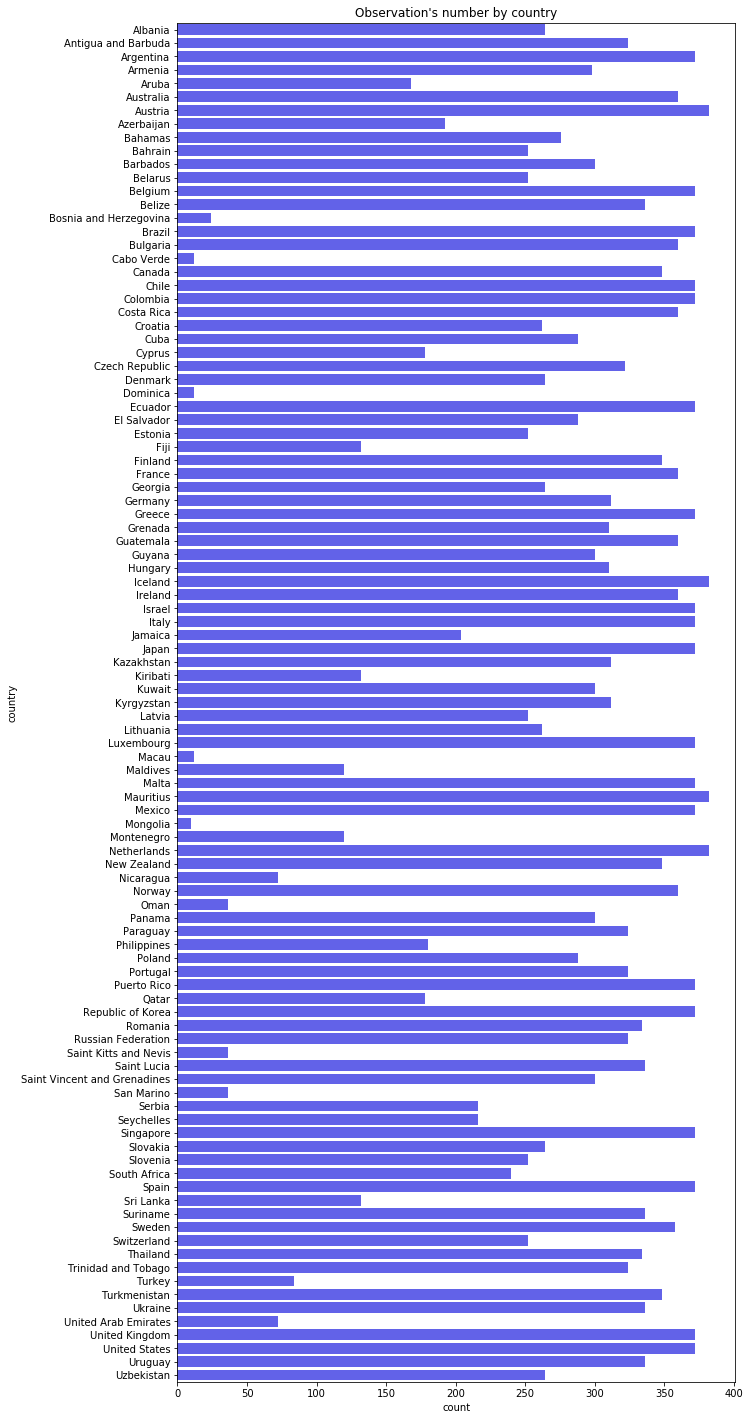

In [349]:
alpha = 0.7
plt.figure(figsize=(10, 25))
sns.countplot(y='country', data=df, alpha=alpha, color='blue')
plt.title('Observation\'s number by country')
plt.show() # visualisation of the observation's count by country

In [350]:
by_country = df.groupby('country')

After creating a dataframe with observation's number by country, we can highlight
the country with the highest/lowest number of observation:

In [351]:
# creating a Series with only the country's name and the number of observations
observation = pd.Series()
for country, country_df in by_country:
    observation[country] = len(country_df.loc[df['country']==country])
df_obs = observation.to_frame()
df_obs.rename(columns={0: 'Observations'}, inplace=True)
df_obs
# This approach is faster than create a dictionary and turn it into a dataframe.

,Observations
Albania,264
Antigua and Barbuda,324
Argentina,372
Armenia,298
Aruba,168
...,...
United Arab Emirates,72
United Kingdom,372
United States,372
Uruguay,336


Country with the lowest value of observation:

In [352]:
# country with the lowest value of observation

index_min = df_obs.idxmin() # index of minimum value
df_obs.loc[index_min, 'Observations']

Mongolia    10
Name: Observations, dtype: int64

In [353]:
df_obs.loc[df_obs['Observations']<=100]

,Observations
Bosnia and Herzegovina,24
Cabo Verde,12
Dominica,12
Macau,12
Mongolia,10
Nicaragua,72
Oman,36
Saint Kitts and Nevis,36
San Marino,36
Turkey,84


Country with the highest value of observation:

In [354]:
# country with the higher value of observation

index_max = df_obs.idxmax()
df_obs.loc[index_max, 'Observations']

Austria    382
Name: Observations, dtype: int64

Countries with observation's number equel or greater than 350:

In [355]:
df_obs.loc[df_obs['Observations']>=350]

,Observations
Argentina,372
Australia,360
Austria,382
Belgium,372
Brazil,372
Bulgaria,360
Chile,372
Colombia,372
Costa Rica,360
Ecuador,372


[back to summary](#summary)

# Data Analysis:

We start the analysis with a quick overview on the main DataFrame grouped by different categories to highlight possible approches.
<a id='by_year'></a>

## 2.1 - GROUP BY YEAR:

In [356]:
y = df.groupby('year') # grouping by year

Sample of the dataframe grouped by year followed by a graph:

In [357]:
by_year = pd.Series()
for year, year_df in y:
    by_year[str(year)] = year_df['suicides_no'].sum() # The object supports both integer and label-based indexing
by_year = by_year.to_frame()
by_year.rename(columns={0: 'Tot_Suicide'}, inplace=True)
by_year.sample(10)

,Tot_Suicide
1994,232063
1999,256119
1997,240745
2002,256095
1992,211473
1990,193361
1991,198020
1989,160244
2009,243487
2004,240861


Text(0.5, 1.0, 'Tot suicides by year')

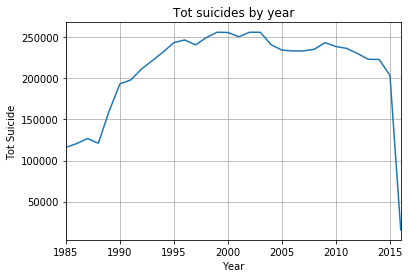

In [358]:
# highlighting tot suicides by year
graph_by_year = by_year.plot(legend=False, grid=True) 
graph_by_year.set_xlabel('Year')
graph_by_year.set_ylabel('Tot Suicide')
plt.title('Tot suicides by year')

Creating a dataframe with the 10 largest values and relative graph: 

In [359]:
# creating a frame with the 10 largest values
largest = by_year.nlargest(10, 'Tot_Suicide')
largest.sort_index(inplace=True) # sorting
largest

,Tot_Suicide
1995,243544
1996,246725
1998,249591
1999,256119
2000,255832
2001,250652
2002,256095
2003,256079
2004,240861
2009,243487


Text(0.5, 1.0, 'Tot suicides by top 10 years')

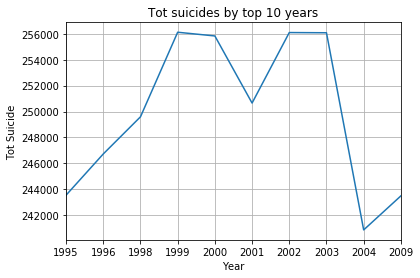

In [360]:
# plotting the frame to highlight the trend 
graph_largest = largest.plot(legend=False, grid=True) 
graph_largest.set_xlabel('Year')
graph_largest.set_ylabel('Tot Suicide') 
plt.title('Tot suicides by top 10 years')

Year with the minimum amount of suicides:

In [361]:
# year with the minimum amount of suicides
year_min_index = by_year.idxmin()
by_year.loc[year_min_index, 'Tot_Suicide']

2016    15603
Name: Tot_Suicide, dtype: int64

Year with the maximum amount of suicides:

In [362]:
# year with the maximum amount of suicides
year_max_index = by_year.idxmax()
by_year.loc[year_max_index, 'Tot_Suicide']

1999    256119
Name: Tot_Suicide, dtype: int64

Grouping the main dataframe by year and sex:

In [363]:
# group by year and sex
gb_year_sex = df.groupby(['year', 'sex'])
df_year_sex = gb_year_sex[['suicides_no']].sum()
df_year_sex.head(10)

suicides_no
year sex                
1985 female        32479
     male          83584
1986 female        33852
     male          86818
1987 female        35006
     male          91836
1988 female        33015
     male          88011
1989 female        41361
     male         118883

Plotting suicides by gender on highest and lowest year:

Text(0.5, 1.0, 'Suicides by gender on highest and lower year')

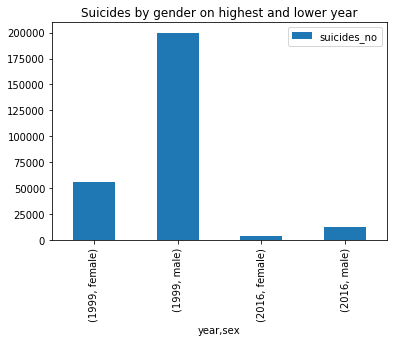

In [364]:
df_year_sex.loc[[1999, 2016]].plot(kind='bar')
plt.title('Suicides by gender on highest and lower year')

<a id='by_age'></a>

[back to summary](#summary)

## 2.2 - GROUP BY AGE:

Overview of the age's categories:

In [365]:
# overview of the age's categories
arr_age = df['age'].unique()
arr_age 

array(['15-24 years', '35-54 years', '75+ years', '25-34 years',
       '55-74 years', '5-14 years'], dtype=object)

Grouping th main dataframe by age, calculation the total amount of suicides per age category:

In [366]:
a = df.groupby('age') # grouping by age

In [367]:
by_age = pd.Series()
for age, age_df in a:
    by_age[age] = age_df['suicides_no'].sum()
by_age.sort_values(ascending=False, inplace=True)
by_age = by_age.to_frame()
by_age.rename(columns={0: 'Tot_Suicides'}, inplace=True)
by_age

,Tot_Suicides
35-54 years,2452141
55-74 years,1658443
25-34 years,1123912
15-24 years,808542
75+ years,653118
5-14 years,52264


Plotting the result:

Text(0.5, 1.0, 'Tot suicides by age category')

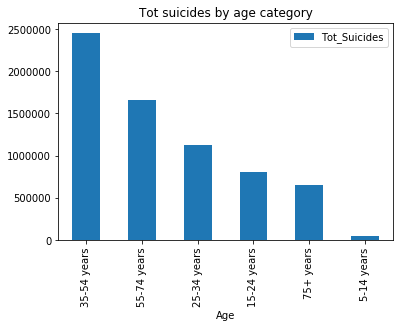

In [368]:
# highlighting the number of suicides per age
graph_by_age = by_age.plot(kind='bar')
graph_by_age.set_xlabel('Age')
plt.title('Tot suicides by age category')

Highlighting the correlation between total suicides and gender by age category:

In [369]:
# highlighting the correlation between tot suicides and gender by age category
gb_age_sex = df.groupby(['age', 'sex'])
gb_age_sex = gb_age_sex[['suicides_no']].sum()
gb_age_sex

suicides_no
age         sex                
15-24 years female       175437
            male         633105
25-34 years female       208823
            male         915089
35-54 years female       506233
            male        1945908
5-14 years  female        16997
            male          35267
55-74 years female       430036
            male        1228407
75+ years   female       221984
            male         431134

Text(0.5, 1.0, 'suicides number by gender per each age category')

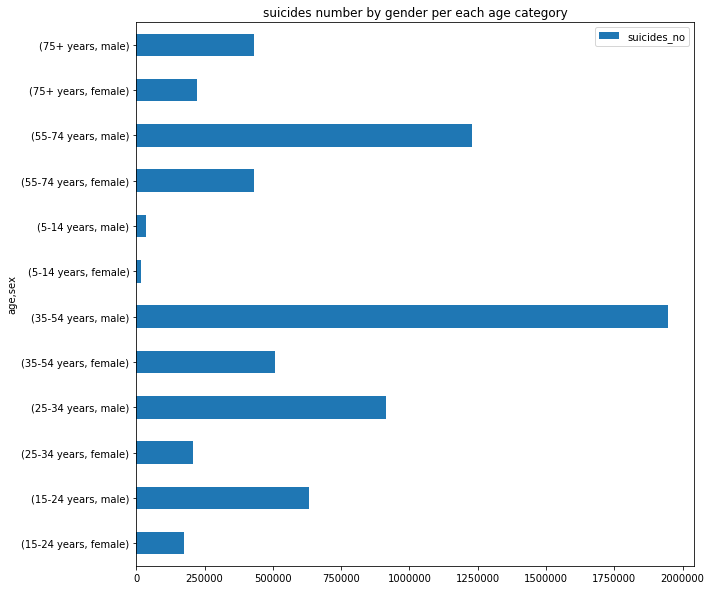

In [370]:
gb_age_sex.plot(kind='barh', figsize=(10, 10))
plt.title('suicides number by gender per each age category')

After grouping by age and country and calculation the corresponding suicides number, we can focus on plotting per each age category, the top 5 countries:

In [371]:
gb_age_country = df.groupby(['age', 'country'])
gb_age_country = gb_age_country[['suicides_no']].sum()
gb_age_country.sample(10)

suicides_no
age         country                                  
75+ years   Sweden                               5083
            Saint Vincent and Grenadines            6
            Slovenia                             1256
15-24 years Finland                              3822
25-34 years Ukraine                             49633
            Fiji                                   74
55-74 years Greece                               3643
15-24 years Czech Republic                       3596
            Portugal                             1505
            Slovenia                              733

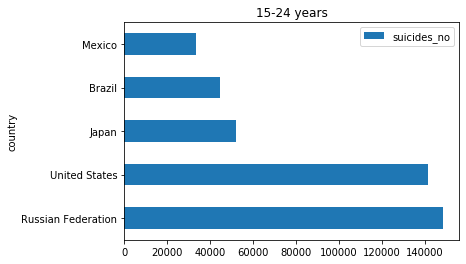

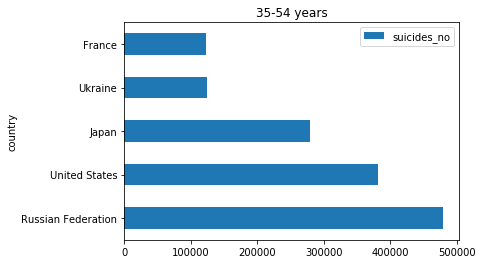

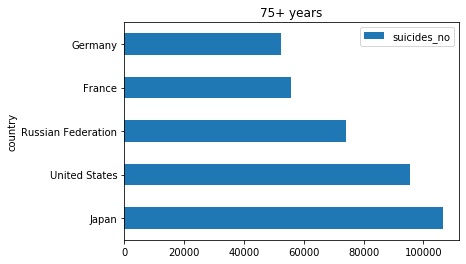

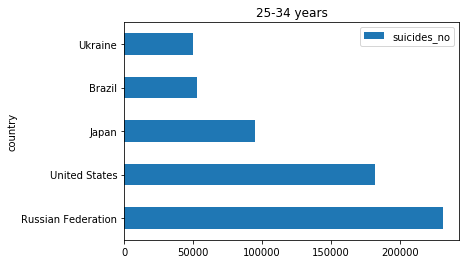

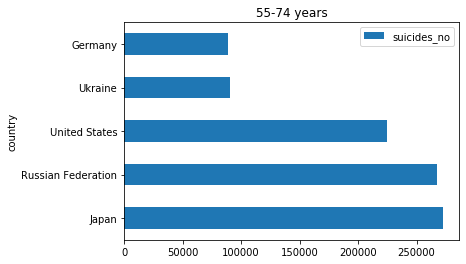

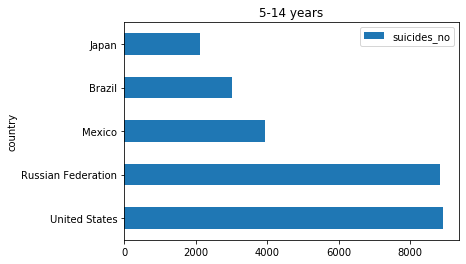

In [372]:
# plotting per each age category the top 5 countries
ages = df['age'].unique()
def plotting_data_frame(data_f, iteration):
    for item in iteration:
        new = data_f.loc[item]
        largest = new.nlargest(5, 'suicides_no')
        largest.plot(kind='barh')
        plt.title(f'{item}')
        plt.show()


plotting_data_frame(gb_age_country, ages)

<a id='by_gender'></a>

[back to summary](#summary)

## 2.3 - GROUP BY GENDER:

Grouping by gender with corresponding suicides number:

In [373]:
sx = df.groupby('sex') # grouping by gender

In [374]:
# tot amount of suicides by gender
by_sex = pd.Series()
for sex, sex_df in sx:
    by_sex[sex] = sex_df['suicides_no'].sum()
by_sex = by_sex.to_frame()
by_sex.rename(columns={0: 'Tot_Suicides'}, inplace=True)
by_sex

,Tot_Suicides
female,1559510
male,5188910


Text(0.5, 1.0, 'Tot suicides by gender')

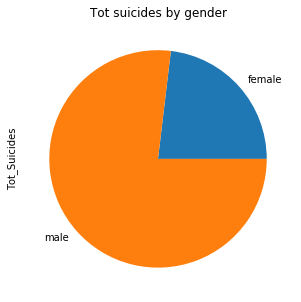

In [375]:
by_sex.plot(kind='pie', subplots=True, legend=False, figsize=(5, 5))
plt.title('Tot suicides by gender')

Now we can group by country and sex to highlight the male/female suicides ratio:

In [376]:
# grouping by country and sex
gb_country_gender = df.groupby(['country', 'sex'])
gb_country_gender = gb_country_gender[['suicides_no']].sum()

In [377]:
# pivoting the data frame to have male and female as columns
new_df = gb_country_gender.pivot_table(values='suicides_no', index=['country'], columns=['sex'])
new_df

sex,female,male
country,,
Albania,693,1277
Antigua and Barbuda,1,10
Argentina,18326,63893
Armenia,495,1410
Aruba,17,84
...,...,...
United Arab Emirates,98,524
United Kingdom,32687,104118
United States,213797,820216


In [378]:
# creating a new column named 'ratio' with the male/female suicides ratio
new_df['ratio'] = new_df['male'] / new_df['female']
new_df

sex,female,male,ratio
country,,,
Albania,693,1277,1.842713
Antigua and Barbuda,1,10,10.000000
Argentina,18326,63893,3.486467
Armenia,495,1410,2.848485
Aruba,17,84,4.941176
...,...,...,...
United Arab Emirates,98,524,5.346939
United Kingdom,32687,104118,3.185303
United States,213797,820216,3.836424


Check any presence of 'nan' or 'inf' value in the 'ratio' column:

In [379]:
# checking if there is any 'nan' or 'inf' values:
new_df['ratio'].values

array([ 1.84271284, 10.        ,  3.48646731,  2.84848485,  4.94117647,
        3.5746444 ,  2.79484653,  3.01941748,  5.64285714,  4.7875    ,
        4.36363636,  4.9880024 ,  2.48439929,  5.82352941,  3.54285714,
        3.62333979,  2.65048154,  7.4       ,  3.44760999,  4.98405034,
        3.67953804,  5.93769152,  2.94203209,  2.5475803 ,  4.02439024,
        3.72445117,  2.53361053,         nan,  2.31195896,  2.49267564,
        4.04953338,  2.34065934,  3.3964752 ,  2.68072781,  3.64553314,
        2.65415835,  3.86929134,  8.5       ,  3.13025849,  3.18826406,
        3.07899531,  3.34509804,  4.13015096,  3.21260724,  3.01630121,
        6.07692308,  2.20670031,  4.59174009,  4.3       ,  2.20930233,
        3.96397421,  4.16168149,  4.59548992,  2.61254613,  1.25      ,
        2.33333333,  4.31818182,  2.91356784,  4.74837075,  7.13461538,
        2.27777778,  2.01036361,  3.28703428,  3.17634855,  2.62689434,
               inf,  5.80273438,  2.28277282,  3.0451356 ,  5.60

Replacing 'inf' values with 'nan' and then dropping any null value from the column:

In [380]:
# replacing inf values with nan values
new_df['ratio'].replace(np.inf, np.nan, inplace=True)
# dropping nan values
new_df['ratio'].dropna(inplace=True)
new_df['ratio'].values

array([ 1.84271284, 10.        ,  3.48646731,  2.84848485,  4.94117647,
        3.5746444 ,  2.79484653,  3.01941748,  5.64285714,  4.7875    ,
        4.36363636,  4.9880024 ,  2.48439929,  5.82352941,  3.54285714,
        3.62333979,  2.65048154,  7.4       ,  3.44760999,  4.98405034,
        3.67953804,  5.93769152,  2.94203209,  2.5475803 ,  4.02439024,
        3.72445117,  2.53361053,  2.31195896,  2.49267564,  4.04953338,
        2.34065934,  3.3964752 ,  2.68072781,  3.64553314,  2.65415835,
        3.86929134,  8.5       ,  3.13025849,  3.18826406,  3.07899531,
        3.34509804,  4.13015096,  3.21260724,  3.01630121,  6.07692308,
        2.20670031,  4.59174009,  4.3       ,  2.20930233,  3.96397421,
        4.16168149,  4.59548992,  2.61254613,  1.25      ,  2.33333333,
        4.31818182,  2.91356784,  4.74837075,  7.13461538,  2.27777778,
        2.01036361,  3.28703428,  3.17634855,  2.62689434,  5.80273438,
        2.28277282,  3.0451356 ,  5.60390258,  3.09618658,  7.57

In [381]:
new_df.reset_index(inplace=True)

We are able now to highlight countries with a specific ratio. 

In this example we can see the countries with the ratio higher than 5

In [382]:
condition = new_df['ratio'] > 5
new_df[condition]

sex,country,female,male,ratio
1,Antigua and Barbuda,1,10,10.000000
8,Bahamas,14,79,5.642857
13,Belize,51,297,5.823529
17,Cabo Verde,5,37,7.400000
21,Costa Rica,979,5813,5.937692
37,Grenada,4,34,8.500000
45,Jamaica,26,158,6.076923
59,Mongolia,52,371,7.134615
66,Panama,512,2971,5.802734
69,Poland,21063,118035,5.603903


<a id='by_gen'></a>

[back to summary](#summary)

## 2.4 - GROUP BY GENERATION:

Grouping by generation and plotting:

In [383]:
sg = df.groupby('generation')

In [384]:
by_gen = pd.Series()
for gen, gen_df in sg:
    by_gen[gen] = gen_df['suicides_no'].sum()
by_gen = by_gen[['G.I. Generation', 'Silent', 'Boomers', 'Generation X', 'Millenials', 'Generation Z']]
# generations are now ordered chronologically
by_gen = by_gen.to_frame()
by_gen.rename(columns={0: 'Tot_Suicides'}, inplace=True)
by_gen

,Tot_Suicides
G.I. Generation,510009
Silent,1781744
Boomers,2284498
Generation X,1532804
Millenials,623459
Generation Z,15906


Text(0.5, 1.0, 'Tot suicides by generation')

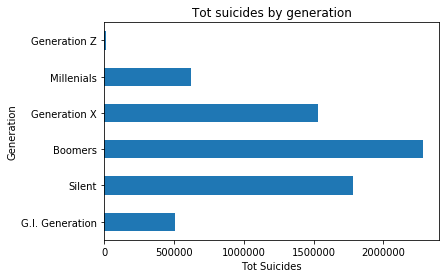

In [385]:
graph_by_gen = by_gen.plot(kind='barh', legend=False)
graph_by_gen.set_ylabel('Generation')
graph_by_gen.set_xlabel('Tot Suicides')
plt.title('Tot suicides by generation')

<a id='by_country'></a>

[back to summary](#summary)

# 2.5 - GROUP BY COUNTRY:

First grouping by country to highlight the top 15 countries with highest/lowest values:

In [386]:
gb_country = df.groupby('country') # grouping the dataframe by country

Text(0.5, 1.0, 'Top 15 countries per suicide no')

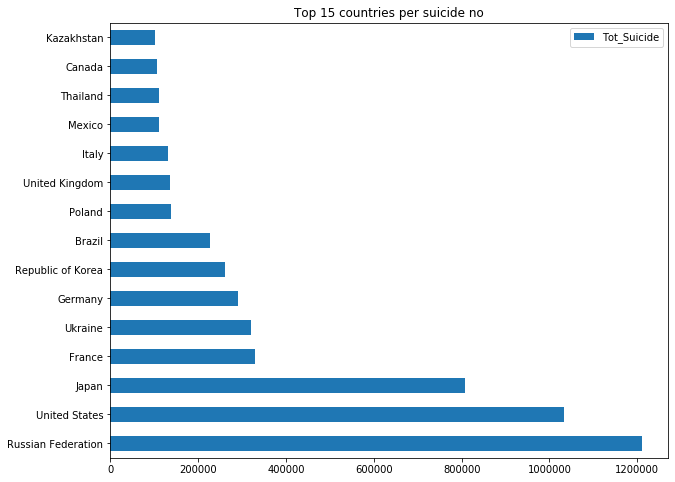

In [387]:
by_country = pd.Series()
for country, country_df in gb_country:   
    by_country[country] = country_df['suicides_no'].sum()
by_country = by_country.to_frame()
by_country.rename(columns={0: 'Tot_Suicide'}, inplace=True)

# visualising the top 15 countries by total number of suicides
by_country_largest = by_country.nlargest(15, 'Tot_Suicide') 
by_country_largest.plot(kind='barh', figsize=(10, 8))
plt.title('Top 15 countries per suicide no')

Text(0.5, 1.0, ' top 15 countries per lowest suicide no')

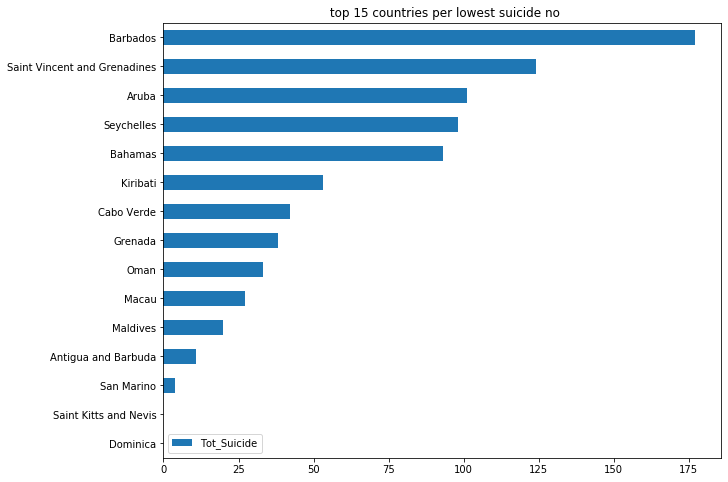

In [388]:
# visualising the 15 countries with the lowest tot number of suicides
by_country_smallest = by_country.nsmallest(15, 'Tot_Suicide')
by_country_smallest.plot(kind='barh', figsize=(10, 8))
plt.title(' top 15 countries per lowest suicide no')

Using again the grouping by 'country' and 'sex' in the Grouping By Gender section, we can visualise the total of suicides per gender on the 15 countries with the highest number of suicides:

In [389]:
# re-calling the dataframe previously made grouping by 'country' and 'sex' in the By Gender section.
gb_country_gender.head(10)

suicides_no
country             sex                
Albania             female          693
                    male           1277
Antigua and Barbuda female            1
                    male             10
Argentina           female        18326
                    male          63893
Armenia             female          495
                    male           1410
Aruba               female           17
                    male             84

Text(0.5, 1.0, 'Tot suicides by gender on top 15 countries')

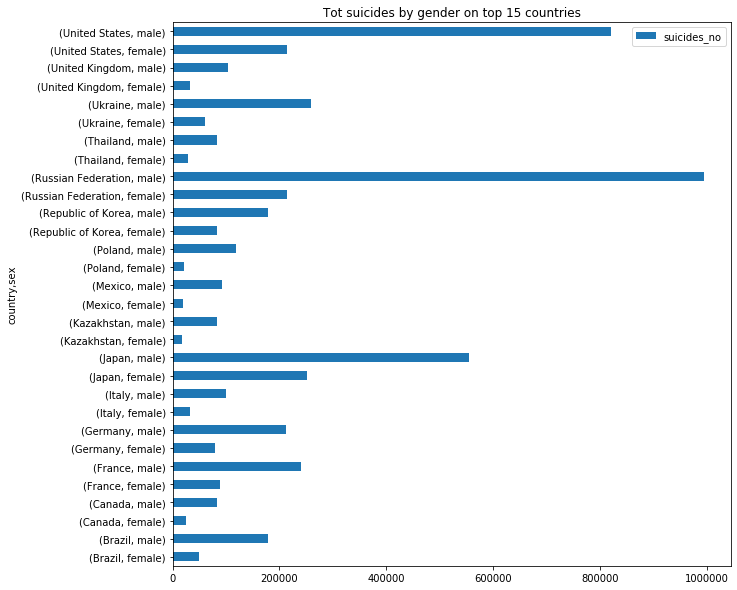

In [390]:
# visualising the tot of suicides per gender on the 15 countries with the highest number of suicides
index_largest = by_country_largest.index
df_country_gender = gb_country_gender.loc[index_largest, 'suicides_no'].to_frame()
df_country_gender.plot(kind='barh', figsize=(10, 10))
plt.title('Tot suicides by gender on top 15 countries')

Looking at the previous analysis done on the years, we can select those years where the curve raised to reach the peak with the highest amount of cases (1990 to 1999). We will highlight for each of those years the countries with the highest number of cases.

In [391]:
gb_year_country = df.groupby(['year', 'country']) # grouping by year/country
gb_year_country = gb_year_country[['suicides_no']].sum()
gb_1990_1999 = gb_year_country.loc[1990:1999]
gb_1990_1999

suicides_no
year country                         
1990 Antigua and Barbuda            1
     Argentina                   2140
     Armenia                       93
     Australia                   2202
     Austria                     1825
...                               ...
1999 Ukraine                    14363
     United Kingdom              4448
     United States              29183
     Uruguay                      450
     Uzbekistan                  1795

[720 rows x 1 columns]

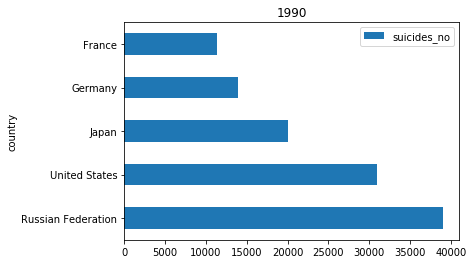

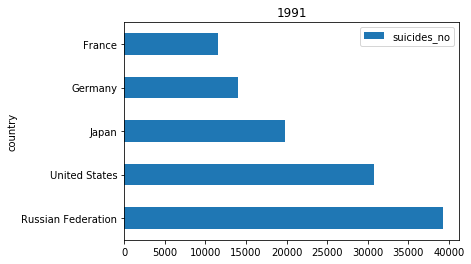

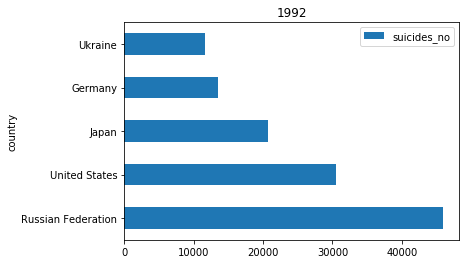

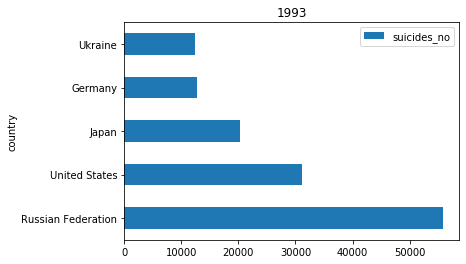

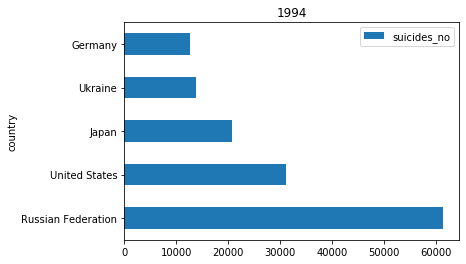

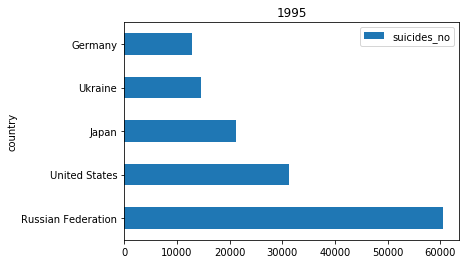

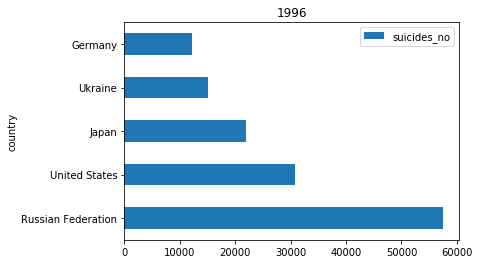

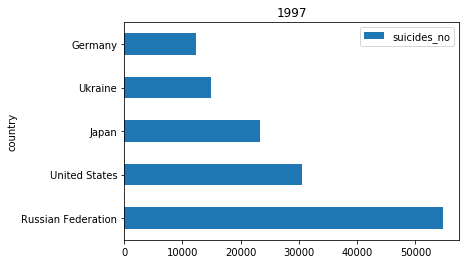

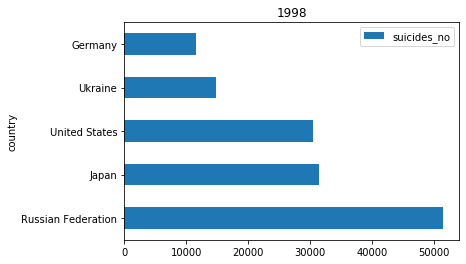

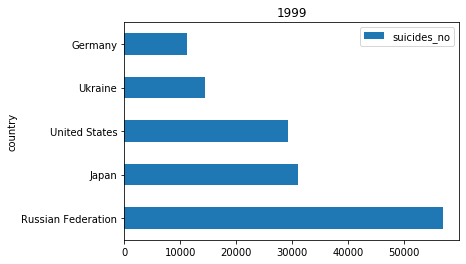

In [392]:
years = [x for x in range(1990, 2000)]
plotting_data_frame(gb_1990_1999, years) # using function plotting_data_frame()

Russian Federation and United States seems to be the two countries with the highest number of cases. We can expect two very large countries to have higher total number of cases compares to smaller countries. According to this observation, we should consider the total amount of population as a parameter to keep in count. We proceed then organising the data includind the total number of population.

We proceed on grouping by 'country' and 'year', calculation the toal amount af suicides and population per each year.

In [393]:
# grouping by country/year
gb_country_year_population = df.groupby(['country', 'year']) 
# getting the tot amount of population per year
gb_country_year_population = gb_country_year_population[['suicides_no','population']].sum() 
gb_country_year_population

suicides_no  population
country    year                         
Albania    1987           73     2709600
           1988           63     2764300
           1989           68     2803100
           1992           47     2822500
           1993           73     2807300
...                      ...         ...
Uzbekistan 2010         1464    25651783
           2011         1640    25978049
           2012         1835    26381830
           2013         1950    26838924
           2014         2095    27313507

[2321 rows x 2 columns]

Now we split the dataframe in 5 dataframes: one for each of the top 5 countries for number of suicides.

In [394]:
# getting the top 5 countries indexes:
top_5 = by_country.nlargest(5, 'Tot_Suicide')
top_5_indexes = top_5.index

I'll visualize the data from the 5 dataframes to show the number of suicide with the population's growth. Seeing how the population changed along the year is a good way to spot events in the country's history that effected the population number. Those events might effect the number of suicides too.

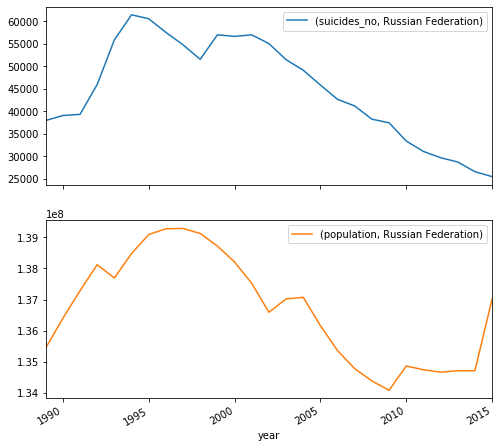

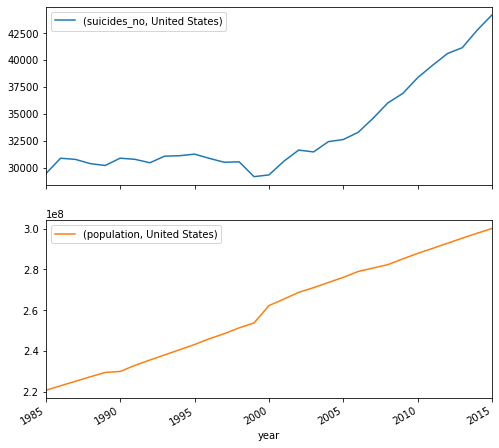

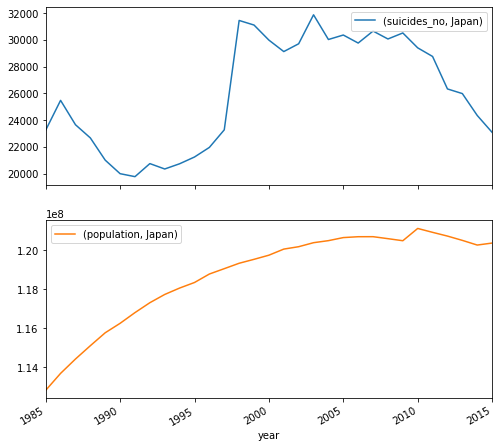

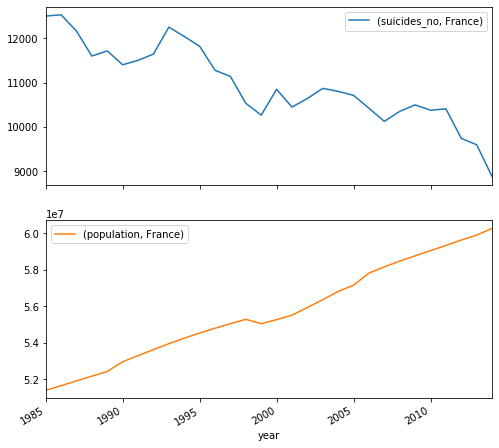

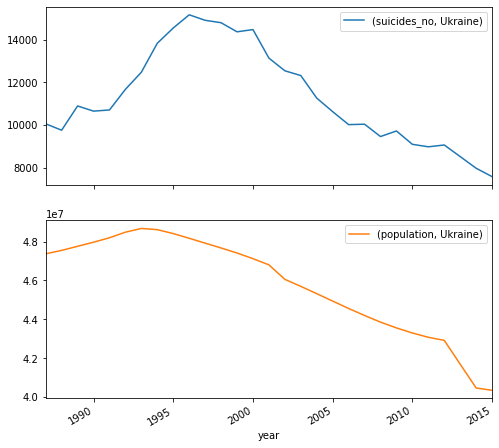

In [395]:
def plotting(data_f, iteration):
    for item in iteration:
        data_f.loc[[item]].unstack(level=0).plot(subplots=True, figsize=(8, 8))

plotting(gb_country_year_population, top_5_indexes)

We proceed to calculate the ratio between suicide number and population number. Calculation are made per 100 thousand people.

First, we select from the main dataframe the columns needed for our analysis and we set country as the index:

In [396]:
df_trimmed = df[['country', 'suicides_no', 'population']]
df_trimmed = df_trimmed.set_index('country')
df_trimmed

,suicides_no,population
country,,
Albania,21,312900
Albania,16,308000
Albania,14,289700
Albania,1,21800
Albania,9,274300
...,...,...
Uzbekistan,107,3620833
Uzbekistan,9,348465
Uzbekistan,60,2762158


In [397]:
df_trim_gb = df_trimmed.groupby('country')

In [398]:
df_russia = df_trim_gb.get_group('Russian Federation')
df_usa = df_trim_gb.get_group('United States')
df_japan = df_trim_gb.get_group('Japan')
df_france = df_trim_gb.get_group('France')
df_ukr = df_trim_gb.get_group('Ukraine')
df_germany = df_trim_gb.get_group('Germany')
df_korea = df_trim_gb.get_group('Republic of Korea')
df_brazil = df_trim_gb.get_group('Brazil')
df_pol = df_trim_gb.get_group('Poland')
df_uk = df_trim_gb.get_group('United Kingdom')
top10_list = [df_russia, df_usa, df_japan, df_france, df_ukr, df_germany, df_korea, df_brazil, df_pol, df_uk]


We proceed with calculationg the suicides/100k population ratio and plotting the result on the 10 countries with the highest value:

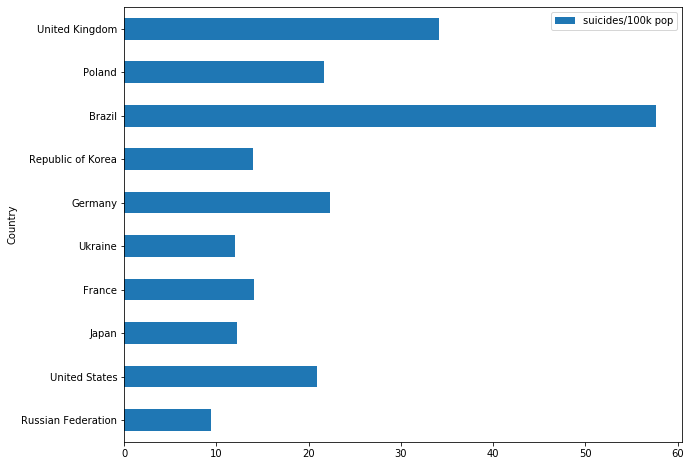

In [399]:
dicts_list = []
def making_dict(df):
    new_df = {'Country': df.index[0],
              'Mean population': df['population'].mean(),
              'Tot suicides': df['suicides_no'].sum()}
    dicts_list.append(new_df)

for df_countries in top10_list:
    making_dict(df_countries)

df_pop = pd.DataFrame(dicts_list).set_index('Country')
# calculating suicides/100k population
df_pop['suicides/100k pop'] = df_pop['Mean population'] / df_pop['Tot suicides']
df_pop[['suicides/100k pop']].plot(kind='barh', legend=True, figsize=(10, 8))

Visualising the ratio values in a dataframe:

In [400]:
df_pop[['suicides/100k pop']].sort_values(by='suicides/100k pop', ascending=False)

,suicides/100k pop
Country,
Brazil,57.604881
United Kingdom,34.166200
Germany,22.282295
Poland,21.621947
United States,20.938432
France,14.100913
Republic of Korea,13.916345
Japan,12.263234
Ukraine,11.966799


[back to summary](#summary)

<a id='conclusion'></a>

## Conclusion.


- Grouping by year:

According to the data set, the year with the highest amount of cases was 1999, the lowest was 2016.
From 1990 to 1999 we can observe a fairly steep growth in cases, followed by 
a stable number around the year 2000.
The number of cases dropped slightly around 2001 to return stable until 2004, 
where we can observe another drop in cases.
Another growth, albeit less steep than before, is observable until 2010 where the cases 
seem to slowly drop.
The ratio between male and female suicide numbers remain pretty constant throughout
the years, around the order of 3 times more for the male category.

- Grouping by age:

The age category with the highest number of recorded cases is the 35-54 years,
followed by 55-74, 25-34, 15-24, over 75 and 5-14. The gap between the numbers seems
to get smaller with the bigger gap between the first two age categories.
The gap between gender remains the same here too, with still a ratio of
3 to 1 with a bigger gap in the top list category (35-54) where the gap is nearly 4 to 1.
Here a summary of which countries are in the top 5 list per age category:

35-54 

1. Russian Federation
2. United States
3. Japan
4. Ukraine
5. France

55-74

1. Japan
2. Russian Federation
3. United States
4. Ukraine
5. Germany

25-34

1. Russian Federation
2. United States
3. Japan
4. Brazil
5. Ukraine

15-24

1. Russian Federation
2. United States
3. Japan
4. Brazil
5. Mexico

75+

1. Japan
2. United States
3. Russian Federation
4. France
5. Germany

5-14

1. United States
2. Russian Federation
3. Mexico
4. Brazil
5. Japan

We observe how Russian Federation and United States are present in every single
category in one of the top three spot, swapping position only with Japan, another country to be
present in every single category at the top 3 apart from the 5-14 category where is
in the lowest position. 
Mexico and Brazil, appearing respectively twice and three times seems to cover the younger
spectrum of the age category (15-24 / 5-14 for Mexico, 5-14 / 15-24 / 25-34 for Brazil) 
with France and Germany, appearing both twice, covering the older spectrum. 
Ukraine is the other European country appearing three times, covering 25-34 / 35-54 / 55-74 years of age.

- Grouping by gender:

As mentioned before, the gender gap seems to be constant around 3 times more 
male cases than female.

- Grouping by generation:

The generation more affected by high suicide rate seems to be the Boomers, followed by
the Silent generation, the Generation X, Millenials and G.I. Generation

- Grouping by country:

After covering the 15 countries with the highest and lowest number of cases,
we observe how Russian Federation and United States cover the top 2 spots with 
a quite big gap between them and the third spot (Japan).
The gender analysis seems to show the same result, with pretty much the same ratio.
Considering the years from 1990 to 1999, where we observe a steady growth in cases, I wanted to highlight the top 5 countries per suicides number. 
We observe how Russian Federation is always at the first spot, followed by USA and Japan in almost every year.
Only the year 1998 and 1999 show Japan taking over USA. Ukraine and Germany complete the list appearing every year with very close numbers. We see France at the bottom of the list only in the year 1990 and 1991.
Such result about Russian Federation and United States is predictable because of the size of the two nations. 
Before excluding this factor from our next analysis, I think was useful to highlight the relationship between population's growth and suicide number in the top 5 countries.
After calculating the suicide number per 100k population ratio, we observe a completely different scenario, with Brazil and the United Kingdom at the first two position albeit with a huge gap.


[back to summary](#summary)